# Proyecto evaluación y predicción del deflactor del PIB de México

En este proyecto se evaluarán los datos del deflactor del PIB desde el 2000 hasta el 2020.

## Objetivos

### Objetivo principal
- El objetivo **principal** será predecir un año que aún no termina que será el de 2022, del cual se tiene también la estimación por parte del INEGI con el valor de 145.3919.
- Objetivos secundarios
    - El **primer** objetivo es poder ver que tan bien se ajusta una curva a la gráfica original de los datos del deflactor del PIB de México comprendido en el periodo entre el 2000 y el 2020.
    - El **segundo** objetivo es ver si incluso con la pandemia es posible predecir el valor del 2021, dato que ya está disponible proporcionado por el INEGI con base del PIB de 2013, teniendo este un valor de 140.6097 para el final del último trimestre del año.

In [50]:
import pandas as pd
import numpy as np
import sympy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

El siguiente DataFrame describe los valores del deflactor del PIB desde el 2000 hasta el 2020

In [51]:
Deflactor = pd.DataFrame(columns=['Año', 'Deflactor'])
Deflactor["Año"] = range(2000, 2021)
Deflactor["Deflactor"] = np.array([51.7569, 54.8838, 57.9043, 60.2433, 65.0397, 68.8601, 73.2597, 
                                   77.5007, 82.2845, 85.5328, 89.4204, 94.6451, 98.4933, 100.0000,
                                   104.4397, 107.4007, 113.4208, 121.0344, 127.0131, 131.2625, 135.9457])
Deflactor.head()

,Año,Deflactor
0,2000,51.7569
1,2001,54.8838
2,2002,57.9043
3,2003,60.2433
4,2004,65.0397


Veamos como se ve esta gráfica

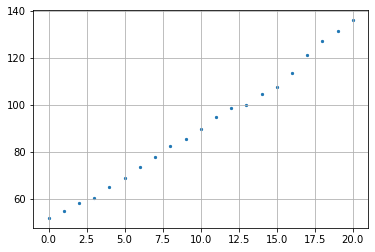

In [52]:
x = Deflactor["Año"] - 2000
y = Deflactor["Deflactor"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

Ajustamos estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años del 2000 al 2020, sin embargo son valores muy grandes para elevarlos a una potencia, usaremos una representación para estos años, por ejemplo $2000 \rightarrow 0$ y $2020\rightarrow 20$).

In [53]:
def funcion_de_costo_1(theta, x, y) :
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args=(x, y))
costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 89.99881159726483
 hess_inv: array([[ 0.08874461, -0.00649351],
       [-0.00649351,  0.00064935]])
      jac: array([ 0.00000000e+00, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([48.61658518,  4.18758672])

In [54]:
def funcion_de_costo_2(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args=(x, y))
costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 39.78568668926338
 hess_inv: array([[ 1.78151432e-01, -3.47294599e-02,  1.41182038e-03],
       [-3.47294599e-02,  9.56831627e-03, -4.45972567e-04],
       [ 1.41182038e-03, -4.45972567e-04,  2.23000203e-05]])
      jac: array([4.76837158e-07, 2.38418579e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([5.16129760e+01, 3.24135801e+00, 4.73114362e-02])

In [55]:
def funcion_de_costo_3(theta, x, y) :
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args=(x, y))
costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 33.71122505619112
 hess_inv: array([[ 2.72042995e-01, -9.89761935e-02,  9.64075375e-03,
        -2.74307293e-04],
       [-9.89761935e-02,  5.36401536e-02, -6.09324973e-03,
         1.88243966e-04],
       [ 9.64075375e-03, -6.09324973e-03,  7.45962691e-04,
        -2.41216524e-05],
       [-2.74307293e-04,  1.88243966e-04, -2.41216524e-05,
         8.04028609e-07]])
      jac: array([ 6.80923462e-04, -2.84361839e-02, -6.08086586e-01, -1.06494031e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 212
      nit: 8
     njev: 40
   status: 2
  success: False
        x: array([ 5.05459091e+01,  3.97222735e+00, -4.63128079e-02,  3.12081096e-03])

Ahora graficaremos los polinomios y los errores

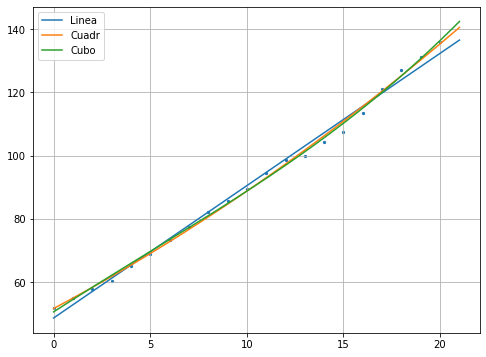

In [57]:
xn = np.linspace(0, 21, 200)
yn1 = resultados_1[0] + resultados_1[1]*xn
yn2 = resultados_2[0] + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0] + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="Linea")
plt.plot(xn, yn2, label="Cuadr")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")
plt.grid()

In [ ]:
plt.bar([1, 2, 3], [costo_1, costo_2, costo_3])
plt.xlabel("Errores")
plt.ylabel("Error en puntos del deflactor")

Se observa que, aunque el polinomio de tercer grado pareciera ser el mejor, aunque no es realmente cierto ya que en la función de optimización, el resultado arrojado fue insatisfactorio y el error se fue más lejos de lo deseado. Por lo que resuelta ser el de mejor  ajuste a la gráfica el polinomio de segundo grado, para poder describir el movimiento del deflactor del PIB.

A continuación se definirá la función con los coeficientes de las Betas obtenidas en la función de optimización y se hará la predicción para 2021.

In [ ]:
x = sp.var("x")
def f(x):
    return 51.6129763+3.24135795*x+0.0473114384*x**2
fs = f(x)
fs

Entonces si queremos predecir 2021, resolvamos con $x= 2021\rightarrow x=21$

In [ ]:
f(21)

In [ ]:
Error = 140.6097 - f(21)
Error

Observamos que es muy parecido y mantiene su tendencia contra el dato original que es de 140.6097.

El error entre el valor original y el valor que se predijo con el modelo es demasiado pequeño.

Ahora vamos a predecir el año de 2022 y compararemos si nuestra predicción puede ser parecida a la del INEGI en ese año la cual es de un valor de 145.3919.

In [ ]:
f(22)

In [ ]:
Error = 145.3919 - f(22)
Error

En esta ocasion se sobreestimó el valor del deflactor y el error creció significativamente en casi medio punto del deflactor. Sin embargo cabe mencionar que ambas son estimaciones y aún no se han cumplido, puede que un modelo u otro sea el que tiene la razón.

## Conclusiones

1. Al estar creciendo el deflactor con una curva algo pronunciada podemos decir que el valor del PIB con respecto de 2013 está siendo cada vez menor, y el crecimiento se está quedando estancado.
2. Los modelos de predicción aquí utilizados en comparación con los del INEGI no son tan distintos en cuanto a resultados, por lo que podemos concluir que los modelos polinomiales son efectivos en muchas ocasiones prácticas.

# Referencias

 https://www.transparenciapresupuestaria.gob.mx/work/models/PTP/Presupuesto/Programacion/Deflactores/Deflactores_PIB.xlsx 
    